In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [9]:
data_path = os.path.join("..", "..", "data", "wine_dataset")

with open(os.path.join(data_path, "wineQualityInfo.txt"), "r") as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [10]:
df = pd.read_csv(os.path.join(data_path, "wineQualityWhites.csv"), sep=",")
df.columns = [col.replace(".", "_") for col in df.columns]
df = df[df.columns[1:]]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Univariate Analysis

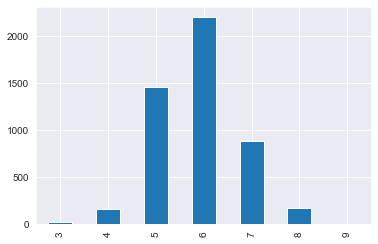

In [12]:
quality_count = df["quality"].value_counts().sort_index()
quality_count.plot(kind="bar");

In [13]:
bins = [0, 5.5, 6.5, 100]
labels = ["Below Average", "Average", "Above Average"]

df["quality_factor"] = pd.cut(df["quality"], bins=bins, labels=labels)

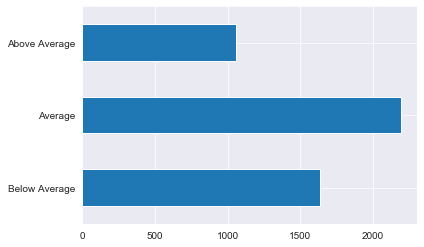

In [14]:
quality_count = df["quality_factor"].value_counts().sort_index()
quality_count.plot(kind="barh");

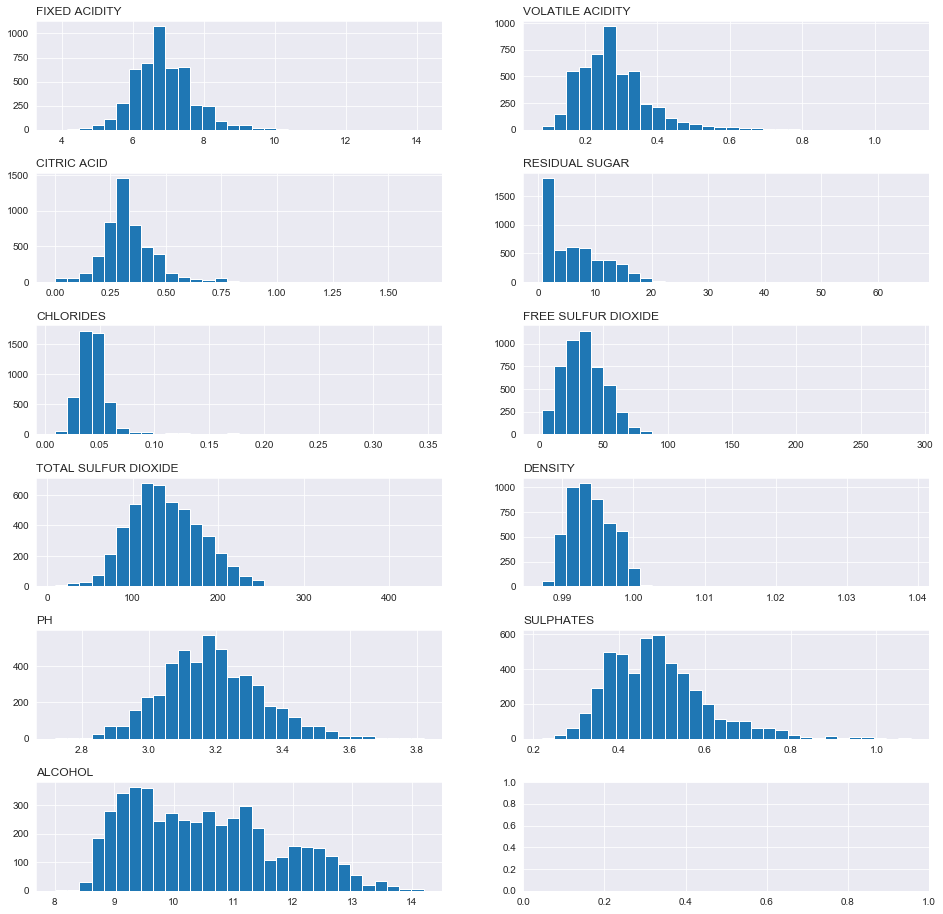

In [15]:
fig, axs = plt.subplots(6, 2, figsize=(16, 16), gridspec_kw={"hspace": .4})

for i in np.arange(len(df.columns[:11])):
    axi = axs.flat[i]
    column = df.columns[i]
    axi.hist(df[column], bins=30)
    axi.set_title(column.replace("_", " ").title().upper(), loc="left")

#### Notes
##### Próximos passos
- Residual Sugar tem uma alta kurtosis e Alcohol parece ter várias distribuições. Deve-se analisar ao detalhe essas distribuições.

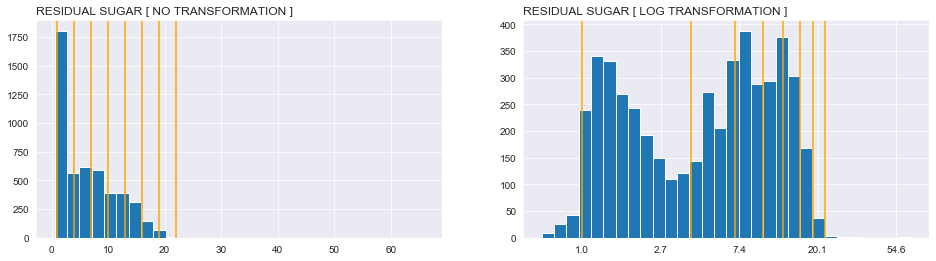

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.hist(df["residual_sugar"], bins=30)
ax1.set_title("Residual Sugar [ No Transformation ]".upper(), loc="left")

log_residual = np.log(df["residual_sugar"])
ax2.hist(log_residual, bins=30)
ax2.set_xticklabels([np.round(np.exp(x), 1) for x in ax2.get_xticks()])
ax2.set_title("Residual Sugar [ Log Transformation ]".upper(), loc="left")

for x in np.arange(1, 25, 3):
    ax1.axvline(x, color="orange", alpha=1)
    ax2.axvline(np.log(x), color="orange", alpha=1);

In [17]:
bins = [-1, 4, 25, 1000]
labels = ["dry", "off-dry", "sweet"]

df["sweetness_factor"] = pd.cut(df["residual_sugar"], bins=bins, labels=labels, right=True)

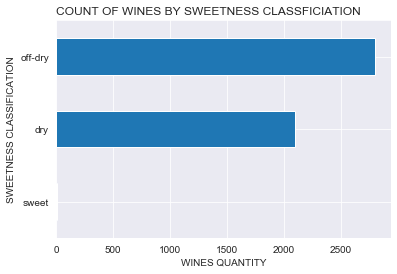

In [18]:
ax = df.sweetness_factor.value_counts().sort_values().plot(kind="barh")

ax.set_title("Count of wines by sweetness classficiation".upper(), fontsize=12, loc="left")
ax.set_ylabel("Sweetness Classification".upper())
ax.set_xlabel("Wines Quantity".upper());

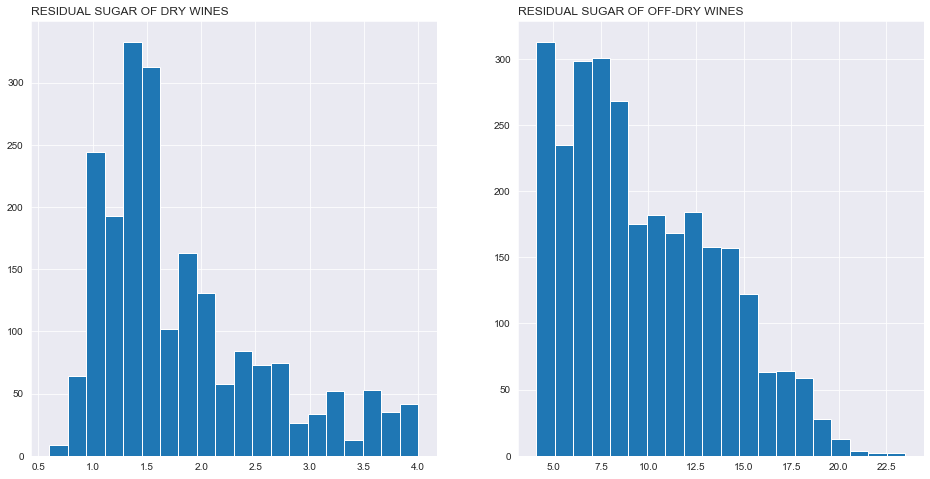

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.hist(df.query("sweetness_factor == 'dry'")["residual_sugar"], bins=20)
ax1.set_title("Residual Sugar of Dry Wines".upper(), loc="left")

ax2.hist(df.query("sweetness_factor == 'off-dry'")["residual_sugar"], bins=20)
ax2.set_title("Residual Sugar of Off-Dry Wines".upper(), loc="left");

In [20]:
def plot_hist_by_quality_factor(dataframe, vector, bins=20):
    fig, axs  = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
    
    quality_factors = ["Below Average", "Average", "Above Average"]
    for i in [0, 1, 2]:
        axi = axs[i]
        filtered_dataframe = dataframe.query("quality_factor == '{}'".format(quality_factors[i]))
        axi.hist(filtered_dataframe[vector], bins=bins)
        axi.axvline(np.median(filtered_dataframe[vector]), color="orange", linewidth=5)
        axi.set_title(vector.upper() + " - " + quality_factors[i].upper(), loc="left")   
    ;

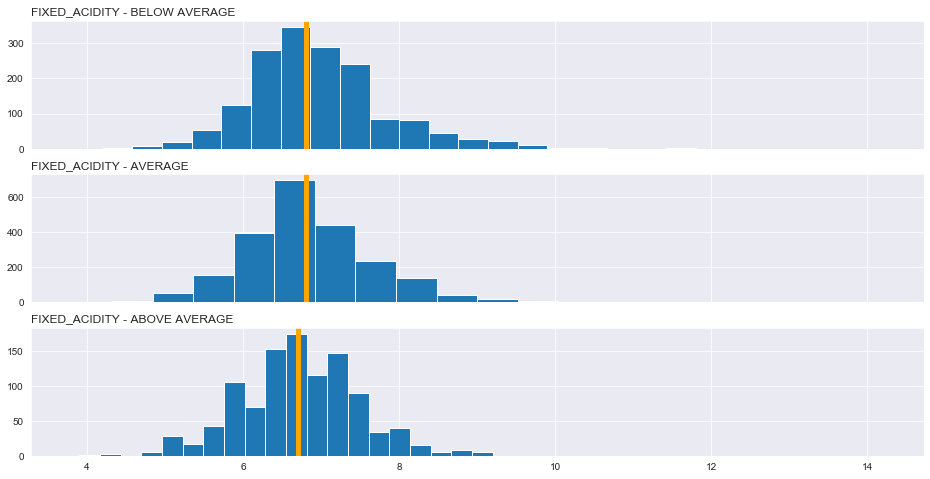

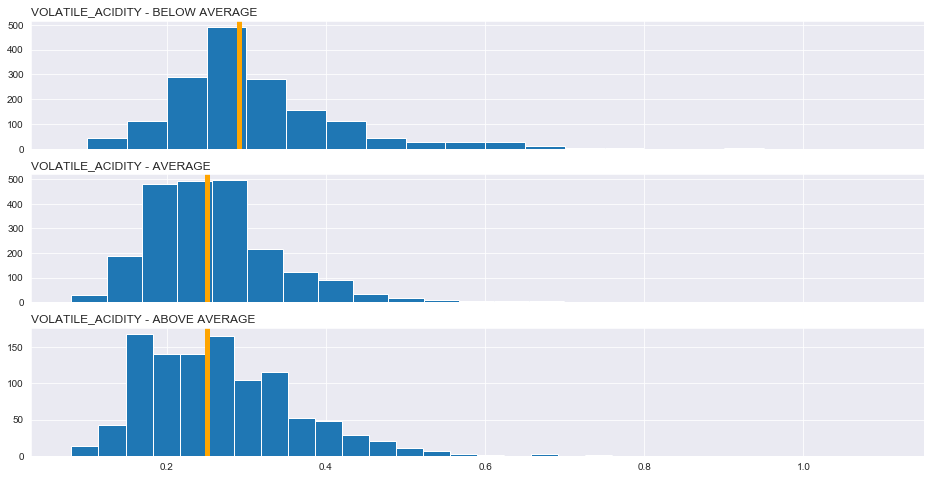

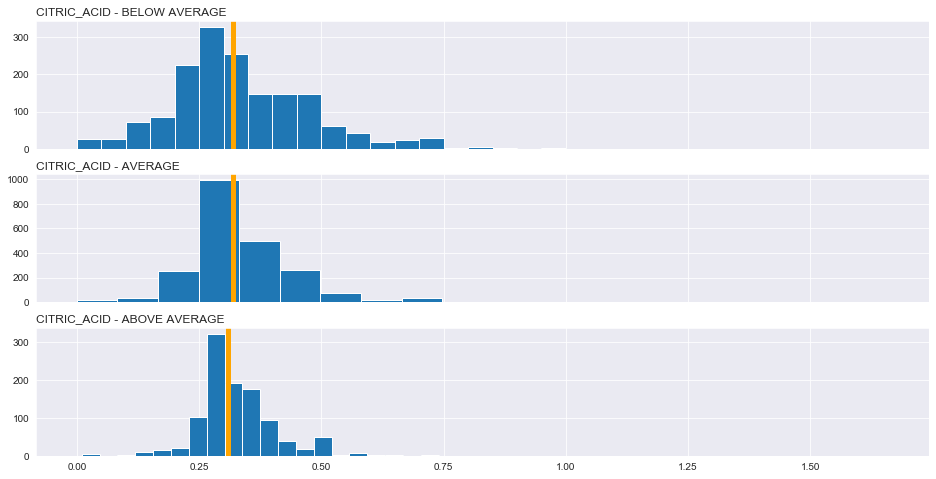

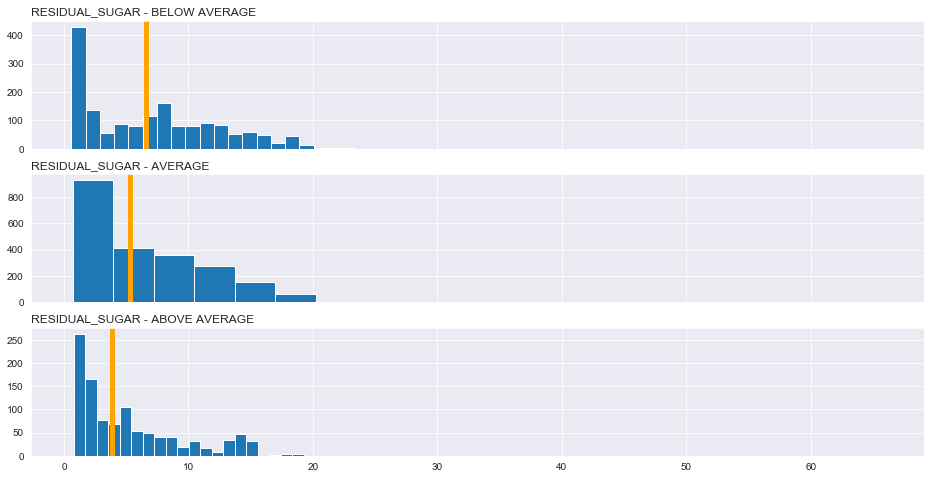

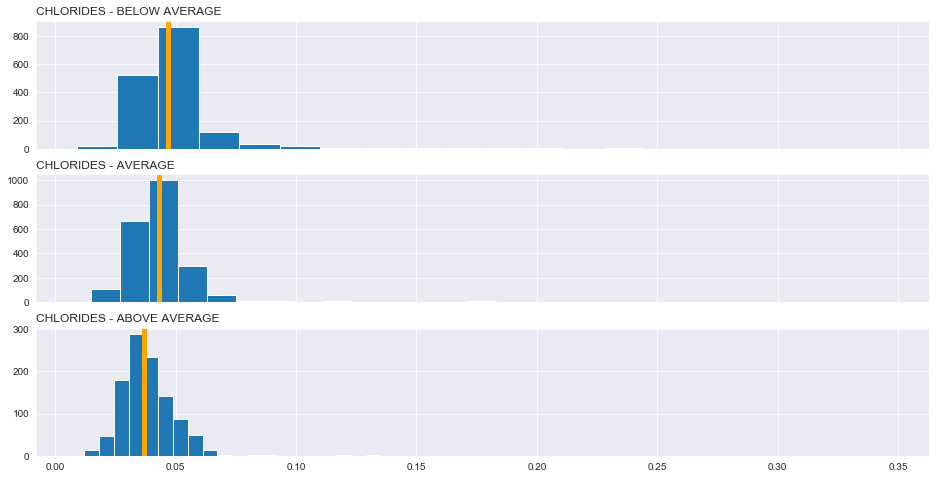

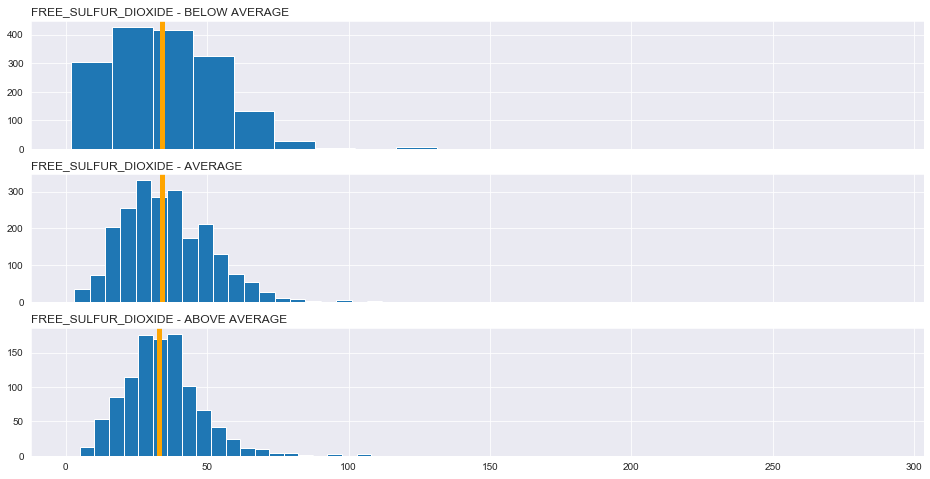

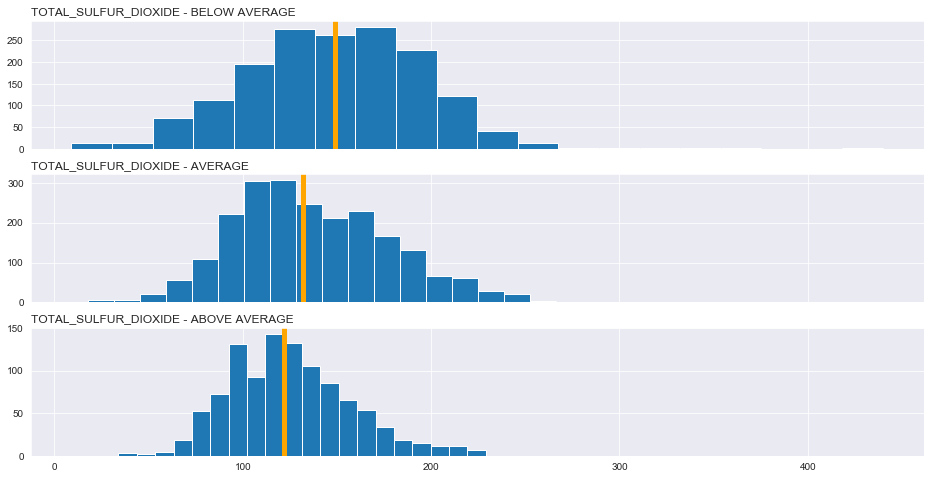

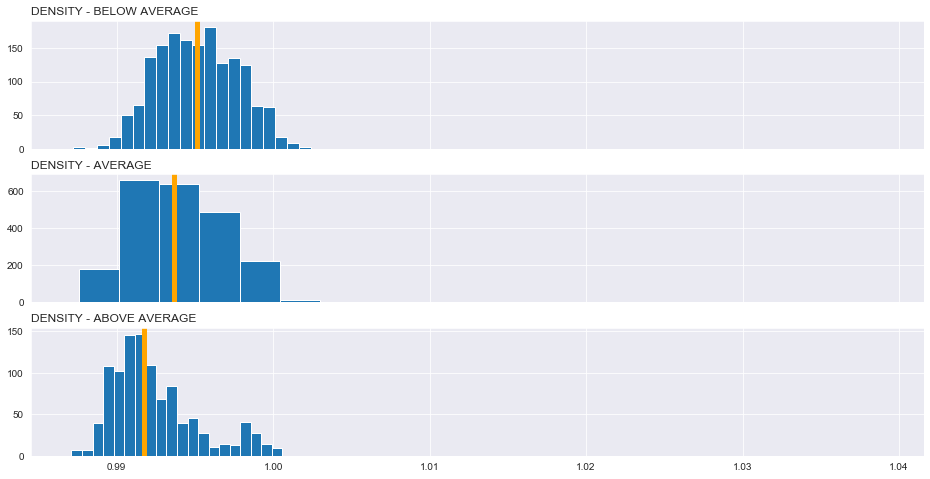

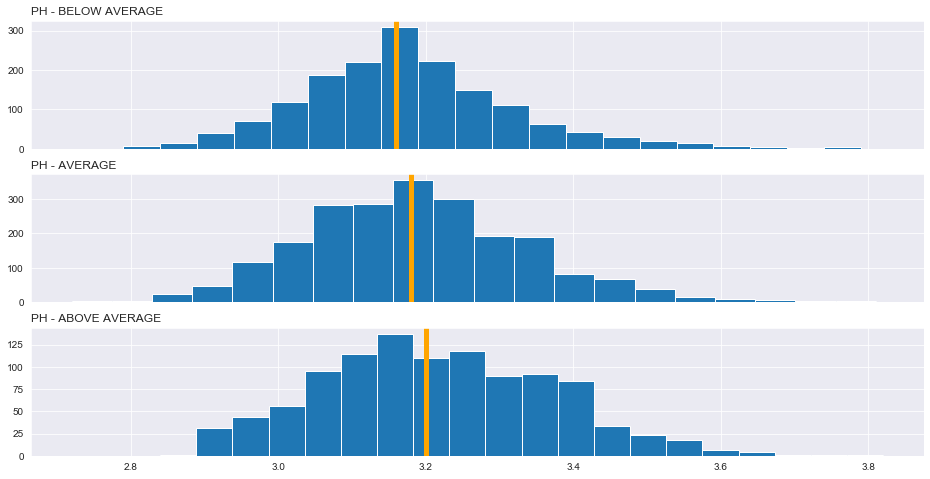

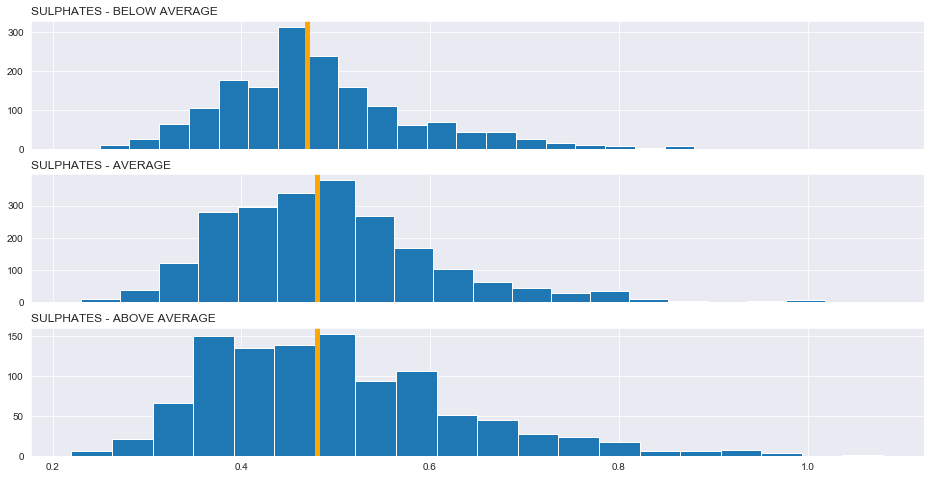

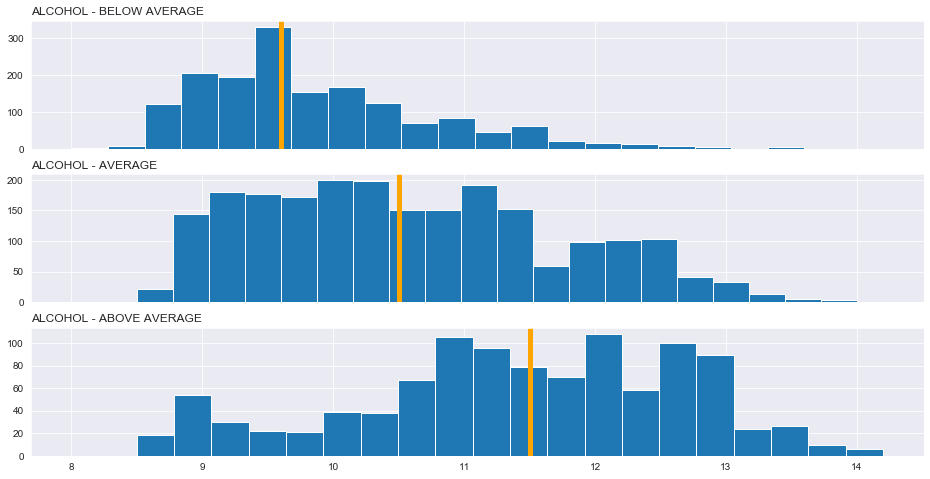

In [21]:
columns_of_interest = df.columns[:11]

for column_of_interest in columns_of_interest:
    plot_hist_by_quality_factor(df, column_of_interest)

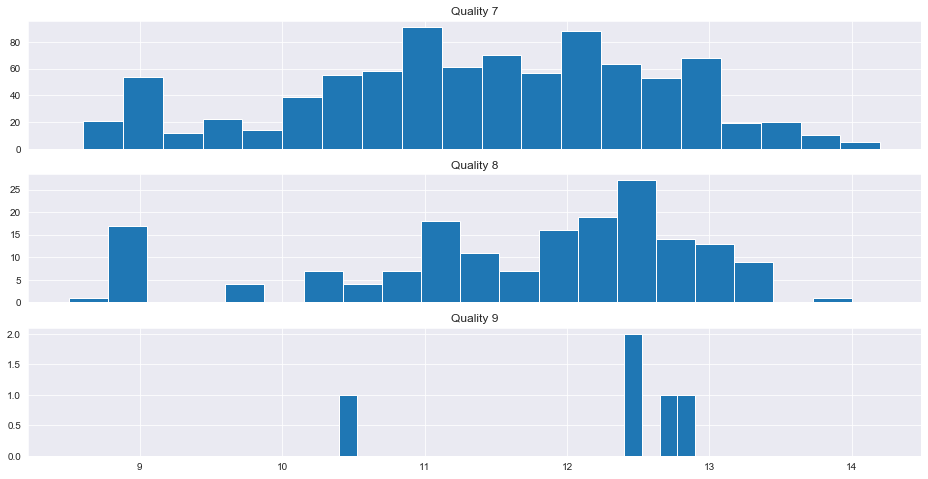

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 8))

aa = df.query("quality_factor == 'Above Average'")

aa_7 = aa.query("quality == 7")
aa_8 = aa.query("quality == 8")
aa_9 = aa.query("quality == 9")

ax1.hist(aa_7.alcohol, bins=20)
ax2.hist(aa_8.alcohol, bins=20)
ax3.hist(aa_9.alcohol, bins=20)
         
ax1.set_title("Quality 7")
ax2.set_title("Quality 8")
ax3.set_title("Quality 9");

#### Notes
##### Próximos passos
- É necessário ver a distribuição de residual sugar por quality_factor, sweetness_factor
- Criar coluna de SO2 Combinado (Bound Sulfur Dioxide) e ver a distribuição dele por quality_factor

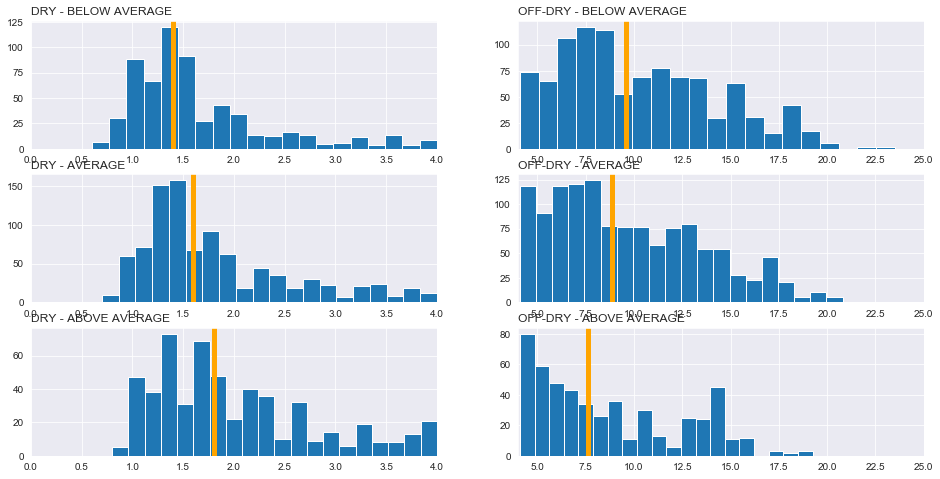

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(16, 8))

xlim = [(0, 4), (4, 25)]

for j, sweetness_factor in enumerate(["dry", "off-dry"]):
    for i, quality_factor in enumerate(["Below Average", "Average", "Above Average"]):
        axi = axs[i, j]
        filtered_df = df.query(f"quality_factor == '{quality_factor}' & sweetness_factor == '{sweetness_factor}'")
        axi.hist(filtered_df["residual_sugar"], bins=20)
        axi.axvline(np.median(filtered_df["residual_sugar"]), color="orange", linewidth=5)
        axi.set_title(f"{sweetness_factor} - {quality_factor}".upper(), loc="left")
        
        axi.set_xlim(xlim[j])

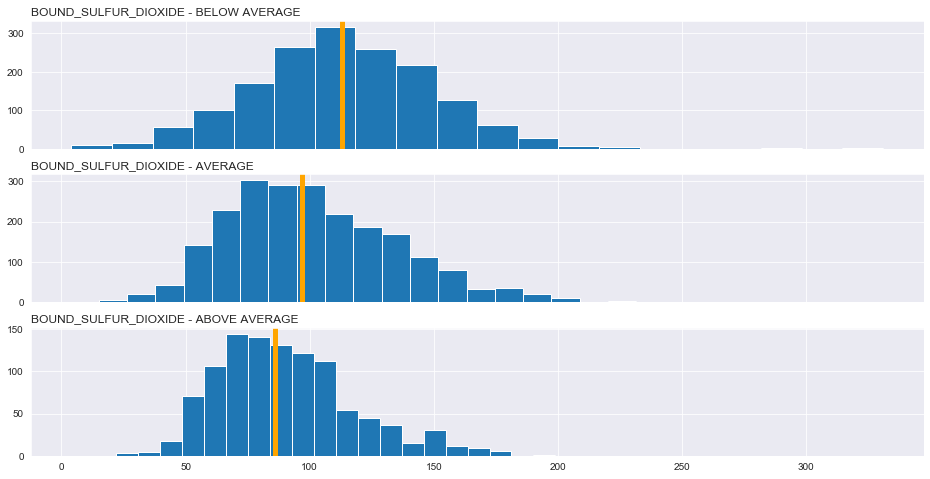

In [25]:
df["bound_sulfur_dioxide"] = df["total_sulfur_dioxide"] - df["free_sulfur_dioxide"]
plot_hist_by_quality_factor(df, "bound_sulfur_dioxide")

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


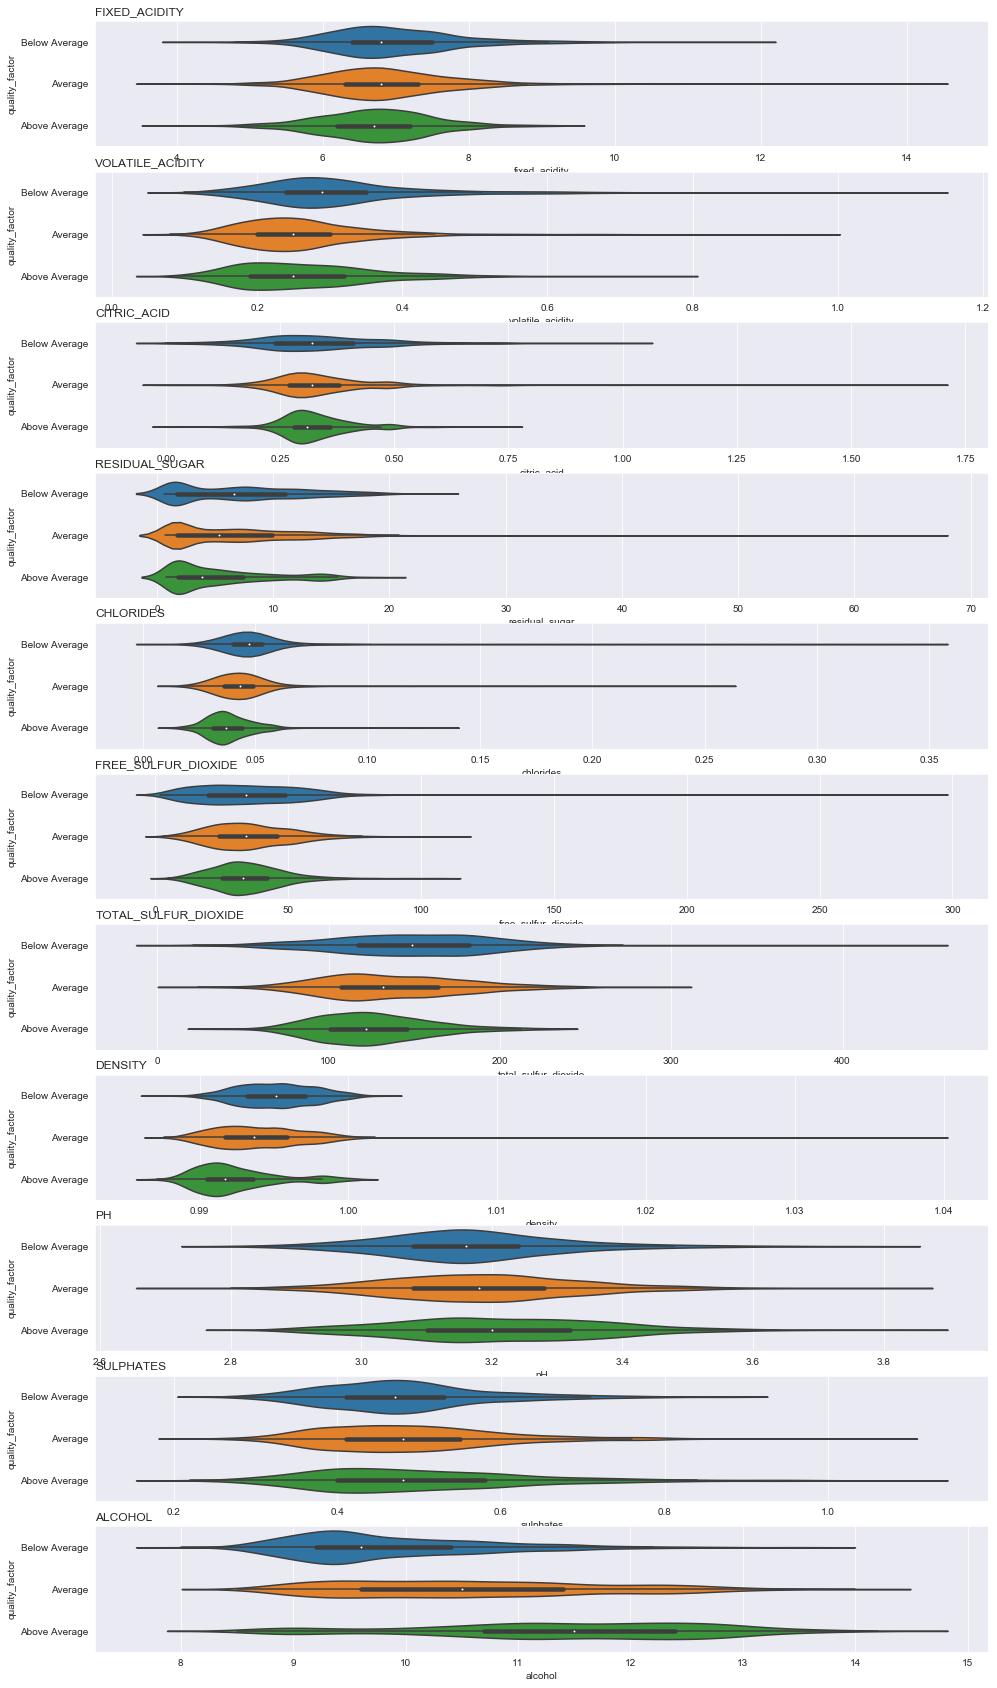

In [27]:
fig, axs = plt.subplots(len(columns_of_interest), figsize=(16, 30))

for i, column_of_interest in enumerate(columns_of_interest):
    axi = axs[i]
    sns.violinplot(x=column_of_interest, y="quality_factor", data=df, ax=axi)
    axi.set_title(column_of_interest.upper(), loc="left")

#### Notes
##### Considerações
- As colunas, com exceção do pH, são enviesadas para a direita.
- Vinhos com teor alcoólico mais elevado tendem a ter uma qualidade superior.
- Para vinhos `secos`, os degustadores preferem os mais doces
- Para vinhos `semi-secos`, os degustadores preferem os menos doces
- Vinhos com qualidade superior tendem a ter taxas de SO2 combinado inferiores

##### Próximos Passos
- Montar gráfico que mostre quality_factor, density, alcohol, residual_sugar, sweetness_factor.
- Visualização entre sulphates, free_sulfur_dioxide, bound_sulfur_dioxide

### Bivariate and Multivariate Analysis

In [28]:
cols_for_scattermatrix = [
    'fixed_acidity', 
    'volatile_acidity', 
    'citric_acid', 
    'residual_sugar',
    'chlorides',
    'free_sulfur_dioxide',
    'bound_sulfur_dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol']

In [29]:
sns.pairplot(df[cols_for_scattermatrix], diag_kind="kde", plot_kws={"edgecolor": "none", "alpha": .01})

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000226B31B50D8> (for post_execute):


KeyboardInterrupt: 

In [30]:
def plot_scatter(vector1, vector2, vector3="quality_factor", jitter=False, alpha=.05, dataframe=df):
    fig, ax = plt.subplots(figsize=(16, 8))
    
    
    if jitter:
        vector1_vals = dataframe[vector1] + np.random.normal(0, 1, dataframe.shape[0])
    else:
        vector1_vals = dataframe[vector1]
    
    if vector3 != "None":
        hue = dataframe[vector3]
    else: 
        hue = None
    
    sns.scatterplot(x=vector1_vals, y=dataframe[vector2], hue=hue, 
                    vmin=3, vmax=8, alpha=alpha, edgecolor="none", palette=["#E8416E", "#CBA8FF", "#4A65E8"])
    
    percentiles1 = np.percentile(dataframe[vector1], [0.25, 99.75])
    percentiles2 = np.percentile(dataframe[vector2], [0.25, 99.75])
    
    ax.set_xlim(percentiles1)
    ax.set_ylim(percentiles2)
    
    ax.set_title(f"{vector1.upper()} x {vector2.upper()}", loc="left", fontsize=16)
    ax.set_xlabel(vector1.upper()), ax.set_ylabel(vector2.upper())

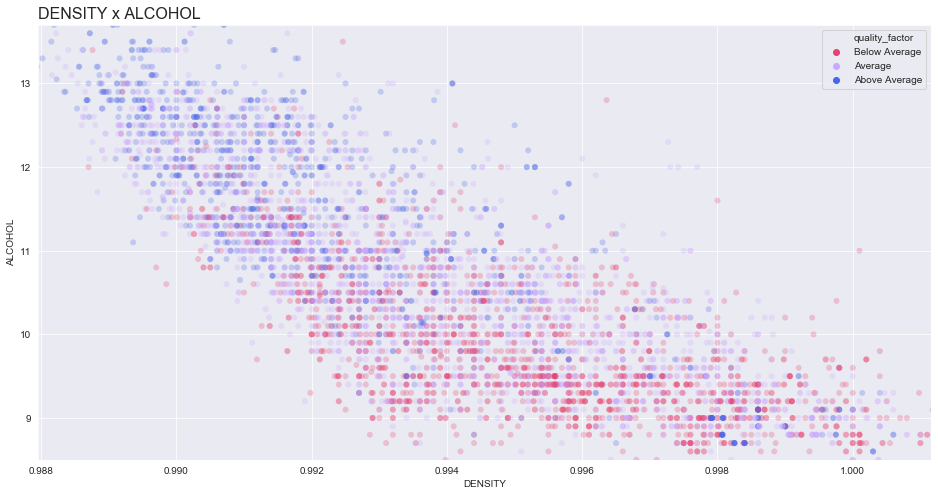

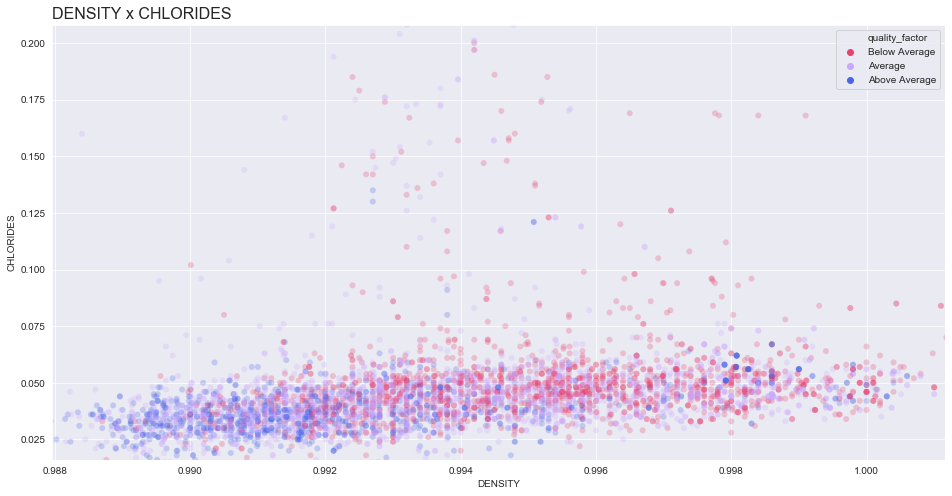

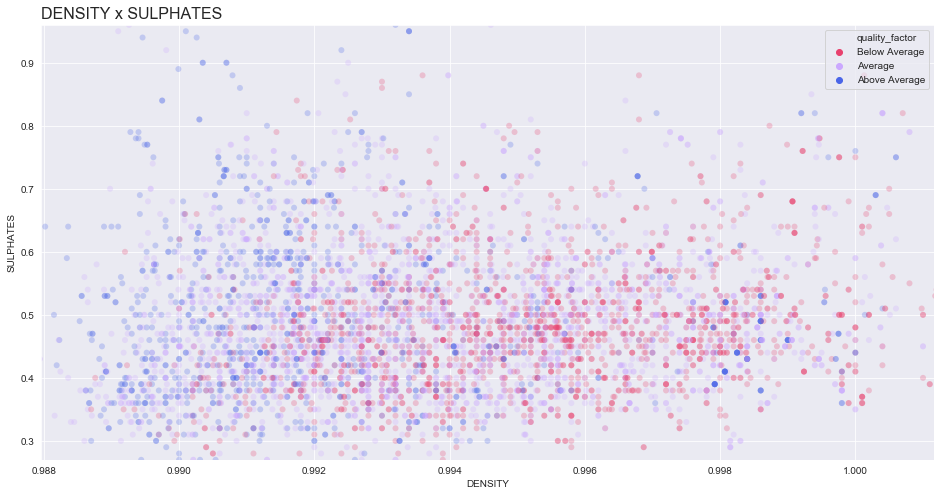

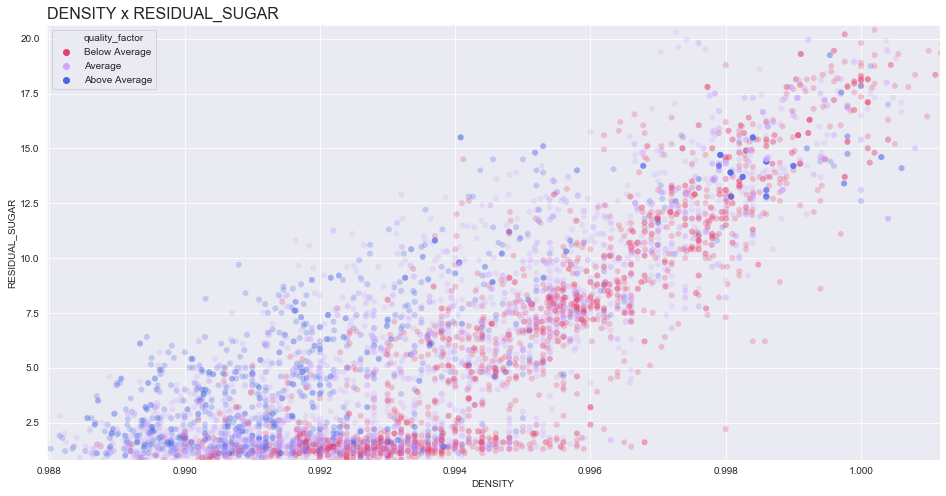

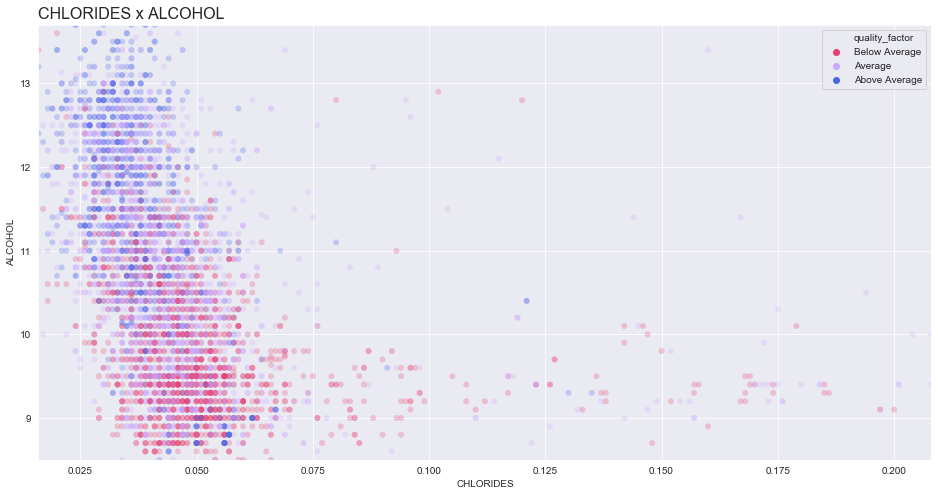

In [31]:
scattercombs = [
    ("density", "alcohol"),
    ("density", "chlorides"),
    ("density", "sulphates"),
    ("density", "residual_sugar"),
    ("chlorides", "alcohol")
]

for x, y in scattercombs:
    plot_scatter(x, y, alpha=.25)

### Notes
##### Considerações
- Teor alcoólico continua sendo bastante importante para a qualidade do vinho.
- Teor alcoólico é inversamente proporcional à densidade.
- Vinhos de menor densidade tendem a ter nota superior ( > alcohol > quality)


- As concentrações de free_sulfur_dioxide e bound_sulfur_dioxide ótimas estão respectivamente nos intervalos [20, 50] mg/L e [50, 110] mg/L.


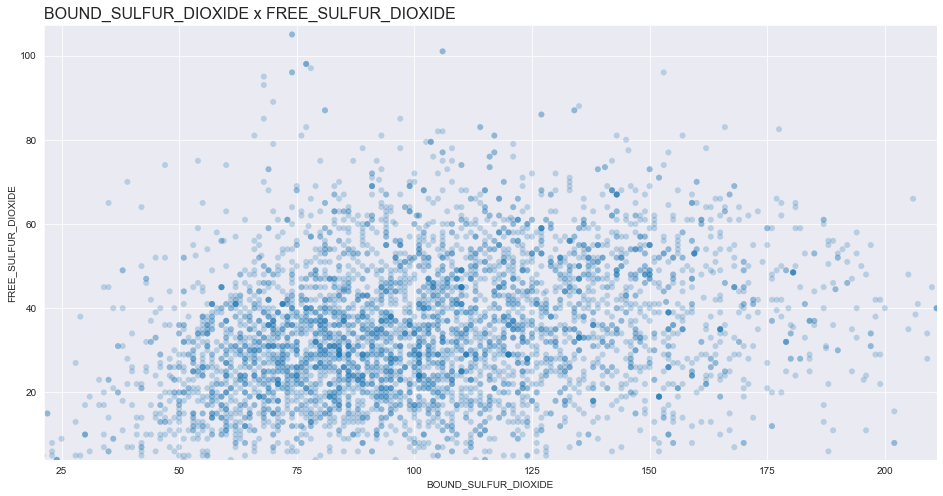

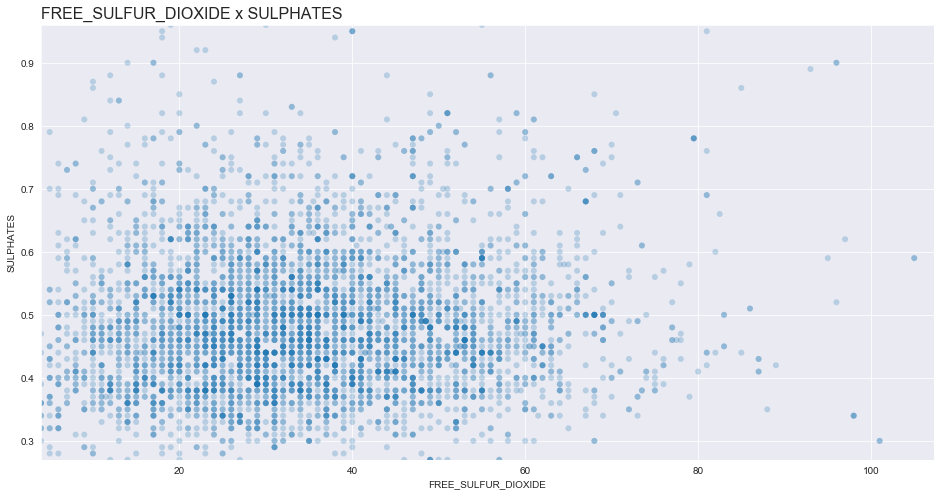

In [32]:
scattercombs = [
    ("bound_sulfur_dioxide", "free_sulfur_dioxide"),
    ("free_sulfur_dioxide", "sulphates"),
]

for x, y in scattercombs:
    plot_scatter(x, y, vector3="None", alpha=.25)